In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x = np.arange(-10,10,0.25)

In [9]:
x;

In [10]:
def sigmoid(z):
    val = 1 / (1 + np.exp(-z))
    return val

In [11]:
y = sigmoid(x)
y;

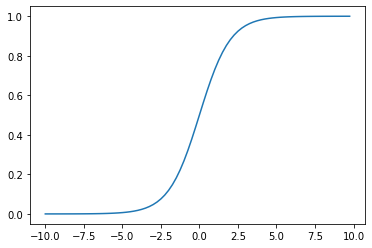

In [12]:
plt.plot(x,y)

#### import necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### import the data

In [16]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [17]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Separate the input and output data

In [20]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [21]:
set(y)

{0, 1}

In [22]:
np.unique(y)

array([0, 1])

In [23]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Purchased', ylabel='count'>

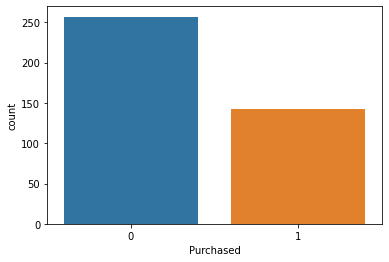

In [25]:
sns.countplot(x=y)

In [26]:
x.isnull().sum()

Age                0
EstimatedSalary    0
dtype: int64

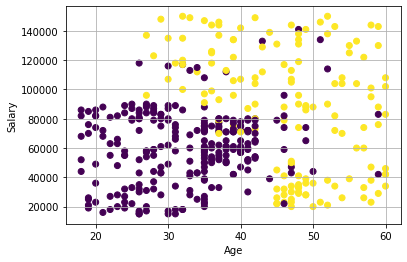

In [28]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'],c=y)

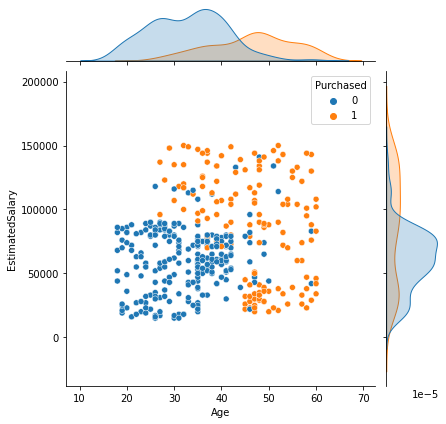

In [29]:
sns.jointplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased')

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [44]:
x_scaled.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


#### cross-validation

In [31]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [51]:
x_train.shape

(300, 2)

In [52]:
x_test.shape

(100, 2)

In [53]:
x_train

,Age,EstimatedSalary
250,0.619048,0.177778
63,0.333333,0.777778
312,0.476190,0.259259
159,0.333333,0.888889
283,0.809524,0.044444
...,...,...
323,0.714286,0.111111
192,0.261905,0.207407
117,0.428571,0.274074
47,0.214286,0.288889


#### Build the model

In [54]:
# import the class
from sklearn.linear_model import LogisticRegression

In [55]:
# create the object
classifier = LogisticRegression()

In [56]:
# train the model
(y_test, y_pred)classifier.fit(x_train, y_train)

LogisticRegression()

In [57]:
# predict the result on unseen / test data
y_pred = classifier.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [59]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [60]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


#### performance evaluation

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

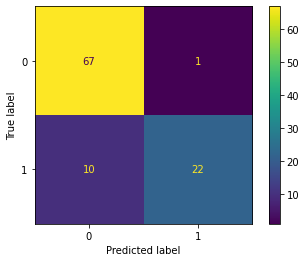

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [64]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [65]:
accuracy_score(y_test, y_pred)

0.89

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



#### Prediction on new data

In [76]:
new = pd.DataFrame({
    'Age':[23,58,43],
    'EstimatedSalary':[23000,110000,47000]
})

In [77]:
new

,Age,EstimatedSalary
0,23,23000
1,58,110000
2,43,47000


In [78]:
classifier.predict(new)

array([1, 1, 1])

In [79]:
new1 = scaler.transform(new)
new1

array([[0.11904762, 0.05925926],
       [0.95238095, 0.7037037 ],
       [0.5952381 , 0.23703704]])

In [80]:
classifier.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 0])

In [81]:
classifier.predict_proba(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.96633438, 0.03366562],
       [0.08664496, 0.91335504],
       [0.64019458, 0.35980542]])